In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import pickle
import warnings
warnings.filterwarnings('ignore')

In [16]:
#Loading the data and sampling the data transpose
df = pd.read_excel('/content/drive/MyDrive/Zomato/zomato_dataset.xlsx')
df.sample(5).T

,82838,27114,799,8700,33496
Restaurant Name,The Kebabish,Firangi Bake,Taj Mahal - Taj Mahal Hotel,Pista House Bakery,Shree Konar Vilas
Dining Rating,3.8,NaN,4.1,NaN,4.3
Delivery Rating,3.7,4.1,4.1,4.3,3.9
Dining Votes,337,0,0,0,208
Delivery Votes,0,737,0,0,0
Cuisine,Fast Food,Mexican,Beverages,Beverages,Biryani
Place Name,Kankaria,Wadala,Taj Mahal Hotel,Charminar,Purasavakkam
City,Ahmedabad,Mumbai,Hyderabad,Hyderabad,Chennai
Item Name,Egg Biryani [2 Eggs],Margherita Pizza (Medium Pizza),Ghee Roast Plain Dosa,Chicken Cheese Roll,Chicken Fried Rice
Best Seller,BESTSELLER,NaN,NaN,NaN,NaN


Data Understanding


*   data.info() - describes datasets size (rows x columns), count of non null values and data types for each variable
*   head and tail - shows top and bottom of the dataset respectively
*   distinct values- to check how many unique values, to filter unique values alone for certain analysis
*   describe - shows each row and column counts and other descriptive details.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


Observation: Dining rating and best seller variables have missing values

In [18]:
df.head(5)

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [19]:
#checking whether distinct values are there
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Restaurant Name: 826 distinct values
Dining Rating: 25 distinct values
Delivery Rating: 19 distinct values
Dining Votes: 294 distinct values
Delivery Votes: 263 distinct values
Cuisine : 48 distinct values
Place Name: 324 distinct values
City: 17 distinct values
Item Name: 55693 distinct values
Best Seller: 14 distinct values
Votes: 760 distinct values
Prices: 2710 distinct values


**DATA Preparation**

*   Variable name correction (to remove unneccessary spaces) for readable column names
*   Combined two independent variables to make meaningful.
*   Checking with each variables null values to determine cleaning is required
*   equalising the rows for better analysis


In [20]:
df.columns = df.columns.str.replace(' ', '') #df.rename(columns={'Cuisine ':'Cuisine'})
df['PlaceName']=df['PlaceName'] + ',' + df['City']
# Remove column name 'City'
df=df.drop(['City'], axis=1)
df.head(10)


,RestaurantName,DiningRating,DeliveryRating,DiningVotes,DeliveryVotes,Cuisine,PlaceName,ItemName,BestSeller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,"Malakpet, Hyderabad",Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,"Malakpet, Hyderabad",Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,"Malakpet, Hyderabad",Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,"Malakpet, Hyderabad",Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,"Malakpet, Hyderabad",Special Doner Wrap Combo,MUST TRY,31,205.0
5,Doner King,3.9,4.2,39,0,Fast Food,"Malakpet, Hyderabad",Chicken Tandoori Pizza [8 inches],BESTSELLER,48,199.0
6,Doner King,3.9,4.2,39,0,Fast Food,"Malakpet, Hyderabad",Special Zinger Tortilla Wrap,CHEF'S SPECIAL,27,165.0
7,Doner King,3.9,4.2,39,0,Fast Food,"Malakpet, Hyderabad",Chicken Popcorn [20 Pieces],BESTSELLER,59,165.0
8,Doner King,3.9,4.2,39,0,Fast Food,"Malakpet, Hyderabad",Chicken Tandoori Sandwich,NaN,29,115.0
9,Doner King,3.9,4.2,39,0,Fast Food,"Malakpet, Hyderabad",Chicken Bread Samoli Shawarma,NaN,31,129.0


In [21]:
#determines the null values
df.isnull().sum()

RestaurantName        0
DiningRating      32236
DeliveryRating     1280
DiningVotes           0
DeliveryVotes         0
Cuisine               0
PlaceName             0
ItemName              0
BestSeller        95715
Votes                 0
Prices                0
dtype: int64

In [22]:
#substituting the null values with average values for better analysis
df['DiningRating'].fillna(df['DiningRating'].mean(),inplace=True)
df['DeliveryRating'].fillna(df['DeliveryRating'].mean(),inplace=True)
#dropping nulls values in all the variables if available
df.dropna(axis=0,inplace=True)
df.isnull().sum()

RestaurantName    0
DiningRating      0
DeliveryRating    0
DiningVotes       0
DeliveryVotes     0
Cuisine           0
PlaceName         0
ItemName          0
BestSeller        0
Votes             0
Prices            0
dtype: int64

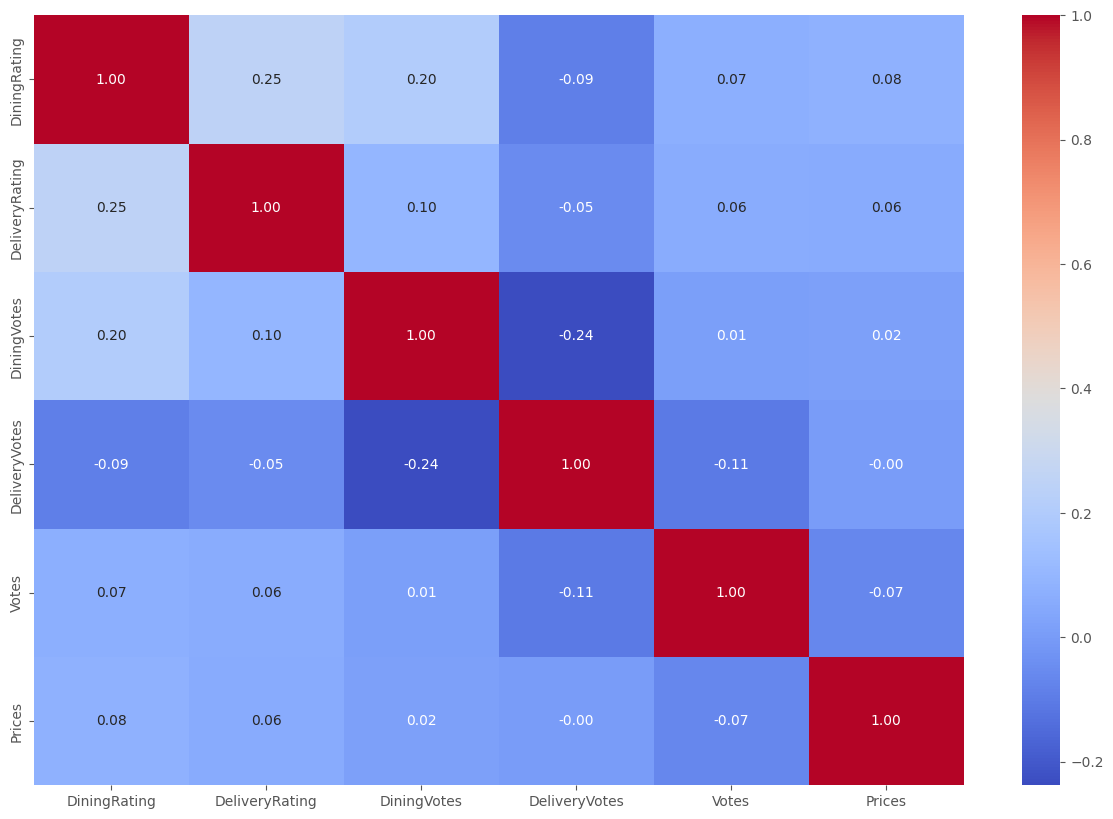

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", )
plt.show();

In [24]:
df.corr(numeric_only=True)

,DiningRating,DeliveryRating,DiningVotes,DeliveryVotes,Votes,Prices
DiningRating,1.000000,0.250131,0.203681,-0.092188,0.067278,0.076724
DeliveryRating,0.250131,1.000000,0.097307,-0.052056,0.059288,0.055703
DiningVotes,0.203681,0.097307,1.000000,-0.238065,0.012692,0.016368
DeliveryVotes,-0.092188,-0.052056,-0.238065,1.000000,-0.106619,-0.000729
Votes,0.067278,0.059288,0.012692,-0.106619,1.000000,-0.066458
Prices,0.076724,0.055703,0.016368,-0.000729,-0.066458,1.000000


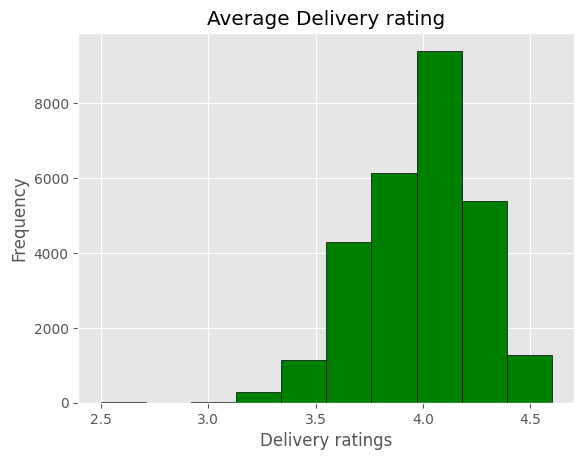

In [25]:
#average delivery rating shows the restaurants received reviews for takeouts
ab=df['DeliveryRating'].plot(kind='hist', bins=10, title='Average Delivery rating', color ='green', ec ='black')
ab.set_xlabel('Delivery ratings');

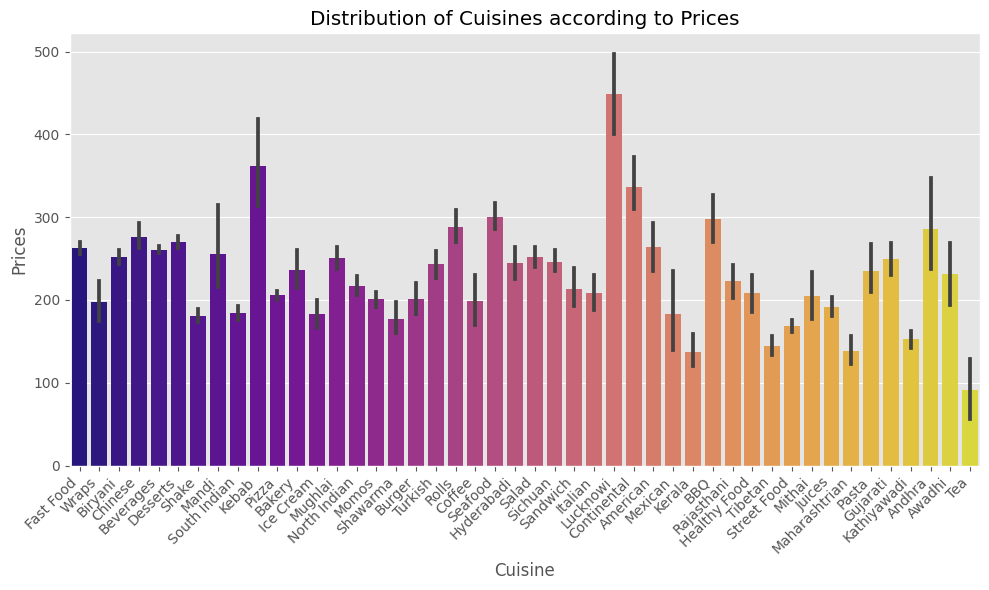

In [26]:
#depending on cuisines distribution of prices been visualized
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Cuisine', y='Prices', palette='plasma')
plt.xlabel('Cuisine')
plt.ylabel('Prices')
plt.title('Distribution of Cuisines according to Prices')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

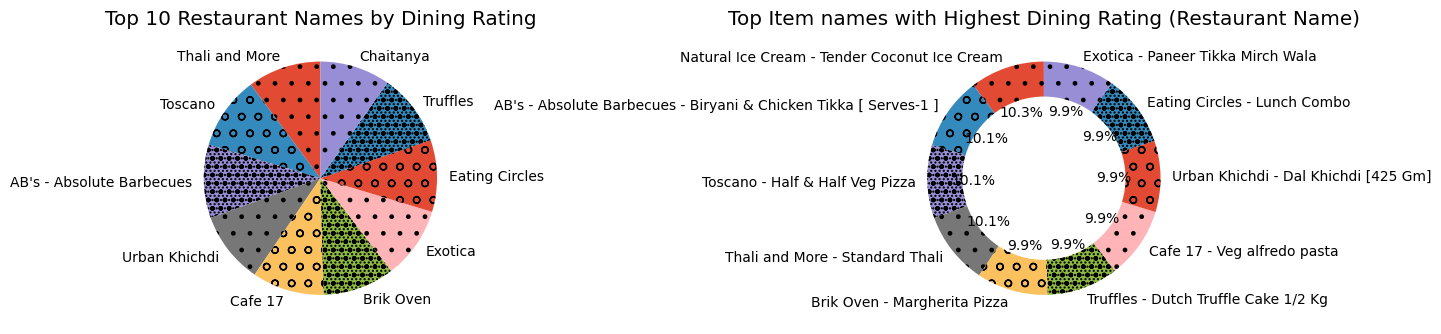

In [27]:
#Top 10 Restaurant Names by Dining Rating and their special dishes
rest_dining= df.groupby('RestaurantName')['DiningRating'].mean().reset_index()
sorted_dining= rest_dining.sort_values('DiningRating',ascending=False).head(10)

Restaurant= sorted_dining['RestaurantName']
ratings= sorted_dining['DiningRating']

plt.figure(figsize=(14, 6))
# First Pie Chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.pie(ratings, labels=Restaurant, startangle=90, hatch=['.', 'o', '..oo..'])
plt.title('Top 10 Restaurant Names by Dining Rating')


top_items = df.loc[df.groupby('RestaurantName')['DiningRating'].idxmax()]
top_items_sorted = top_items.sort_values('DiningRating', ascending=False).head(10)

items = top_items_sorted['ItemName']
restaurants_top_items = top_items_sorted['RestaurantName']
ratings_top_items = top_items_sorted['DiningRating']

plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.pie(ratings_top_items, labels=[f"{restaurant} - {item}" for restaurant, item in zip(restaurants_top_items, items)], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3),hatch=['.', 'o', '..oo..'])
plt.title('Top Item names with Highest Dining Rating (Restaurant Name)')
plt.tight_layout()

plt.show()

In [28]:
# Most popular Restaurant by Place in India
df['Total_rating'] = df['DiningRating'] + df['DeliveryRating']
rating_max = df.groupby(['PlaceName', 'RestaurantName'], as_index=False)['Total_rating'].max()
rating_max = rating_max.loc[rating_max.groupby('PlaceName')['Total_rating'].idxmax()]
rating_max = rating_max.set_index('PlaceName').round({'Total_rating': 1})
rating_max = rating_max.sort_values(by='Total_rating', ascending=False)
rating_max.head(10)

,RestaurantName,Total_rating
PlaceName,,
"Connaught Place, New Delhi",Natural Ice Cream,9.3
"12th Square Building, Hyderabad",Exotica,8.9
"Rajinder Nagar, New Delhi",Kings Kulfi,8.9
"St. Marks Road, Bangalore",Truffles,8.9
"Dadar West, Mumbai",Chaitanya,8.9
"C Scheme, Jaipur",Thali and More,8.8
"Kaloor, Kochi",Al Taza,8.8
"Carter Road, Mumbai",Boojee Cafe,8.8
"Nungambakkam, Chennai",Toscano,8.8


# Machine learning

For customer retention, customer satisfaction and to improve the delivery service we take Delivery Rating as target variable



*   Splitting the data into training and testing sets
*   Defining preprocessing steps

*   Define the pipeline and train the model
*   Evaluate the model



In [29]:
X = df.drop('DeliveryRating', axis=1)
y = df['DeliveryRating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))  # Use a regression model
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.3271764449324307e-06
R-squared: 0.9999789803836363


In [30]:
# Save the entire pipeline to a pickle file
with open('/content/drive/MyDrive/Zomato/delivery_rating_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)


In [31]:
#For a colloborative environment, to share it to my stakeholders unable to understand cleaning process
#exporting this excel file and sharing it.
df.to_csv('/content/drive/MyDrive/Zomato/cleaned_dataset.csv', index=False)